# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones](https://https://domingomery.ing.puc.cl/teaching/patrones/)

Departamento de Ciencia de la Computación

Universidad Catolica de Chile

(c) Domingo Mery, http://domingomery.ing.uc.cl



# Ejercicio 05 (E05): Detección de paredes rayadas

En este ejercicio se realizará la clasificación entre dos clases de "parches" de pared de 64x64 pixeles (en escala de grises):

* Clase 0: No-Rayas (contiene parches originales de pared sin rayas). [Ver parches no rayados a color](https://www.dropbox.com/s/8501gryycq6nxn4/patches_0.png?dl=0)

* Clase 1: Rayas (contiene parches originales de pared con pintas, grafitis, rayados, etc.). [Ver parches rayados a color](https://www.dropbox.com/s/0ztucomc9yvhp4a/patches_1.png?dl=0)




La base de datos contiene 1200 imágenes de 64x64 pixeles (600 imágenes por clase).

**ADVERTENCIA:** Este ejercicio tiene fines pedagógicos sólamente, con la idea de que la solución a este problema pueda ejecutarse en un par de minutos. Un buen detector de rayas sigue esta idea pero con miles de imágenes a color por clase.


<font color='red'> **AYUDA:** 

<font color='green'>  Todas las funciones, librerías y códigos que Ud. debe escribir en este ejercicio E05 pueden ser obtenidas de los códigos de ejemplo vistos en clase, como por ejemplo el código de solución del [Ejercicio E04](https://drive.google.com/file/d/1p2_IWE1DncJ8P29VCvex031xTgPQUqFL/view?usp=sharing).





# Pregunta 1: Setup inicial 

(1 punto)

Liberías necesarias para que funcione el algoritmo.

## Instalación de Balu3

[Balu3](https://github.com/domingomery/balu3) es una librería creada para reconocimiento de patrones. 

La instalación se realiza clonando el repositorio de GitHub (use el comando `!git clone ...`) e instalando la librería (use el comando `!pip install ...`

<font color='red'> **SALIDA ESPERADA:** 

`:`

`Successfully built balu3`

`Installing collected packages: balu3`

`Successfully installed balu3-1.0`


In [1]:
#
# INGRESE CODIGO PARA DESCARGAR E INSTALAR BALU3
# (no inventar, usar código de Ejercicio 04 ,ver AYUDA al inicio de este Colab)
# (son dos líneas de código)
#

!git clone https://github.com/domingomery/balu3
!pip install ./balu3

Cloning into 'balu3'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 236 (delta 138), reused 157 (delta 65), pack-reused 0
Receiving objects: 100% (236/236), 66.26 KiB | 4.73 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=43686 sha256=39c25c4ff9e2c43c1fae8bb765897dba27babbac8cf188baeafd22392ec58c61
  Stored in directory: /tmp/pip-ephem-wheel-cache-1r6duocj/wheels/16/25/1e/631c042e986997d66481af1f42bd9a1f0937c379ca8d6f32fb
Successfully built balu3


## Setup de librerías

In [2]:
#
# INGRESE AQUI CODIGO PARA IMPORTAR LIBRERIAS DE NUMPY Y MATPLOTLIB 
# (no inventar, usar código de Ejercicio 04 ,ver AYUDA al inicio de este Colab)
# (son dos líneas de código)
#

import numpy             as     np
import matplotlib.pyplot as     plt

In [3]:
#
# INGRESE AQUI CODIGO PARA IMPORTAR LAS SIGUIENTES FUNCIONES:
# tqdm, lbp, haralick, gabor, hog, imageload
# (no inventar, usar código de Ejercicio 04 ,ver AYUDA al inicio de este Colab)
# (son tres líneas de código)
#

from   tqdm.auto         import tqdm
from   balu3.fx.chr      import lbp, haralick, gabor, hog
from   balu3.io.misc     import imageload

## Funciones necesarias

In [4]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
# (las funciones usadas en los códigos de ejemplo ahora son parte de Balu3)
#

from   balu3.cl.basics import SplitTrainTest # Separación entre training y testing
from   balu3.cl.basics import ClassifierKNN  # Clasificación usando KNN con 1 vecino

# EJEMPLO DE USO:
# Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,n) # las primeras n muestras de cada clase de X son training, el resto es testing
# acc,C = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)  # calculo de accuracy y matriz de confusion

## ADVERTENCIA

<font color='red'> PARA LA EJECUCIÓN DE ESTA TAREA NO DEBE USAR OTRAS LIBRERÍAS 

(sólo está permitido usar las librerías definidas en las celdas anteriores)

# Pregunta 2: Carga de base de datos y despliegue de imagen `W_01_002.png`

(1 punto)

La base de datos consiste en 2 clases con 600 imágenes por clase. Se almacenan en la carpeta `rayas` con el formato `W_xx_nnn.png`, donde `xx` es el ID de la clase (01 para no-rayas, 02 para raya) y `nnn` es el número de la foto de la clase (001, 002, ... 600). Las fotos son de 64x64 pixeles en escala de grises.


Carga la base de datos, descargando el archivo rayas.zip que se encuentra en este link: `https://www.dropbox.com/s/08nu4a4mayk7kj2/rayas.zip`. Una vez descargado el archivo zip, debes descomprimirlo.

Finalmente, usando `imageload` y la librería `matplotlib` despliegue la imagen `W_01_002.png` que se encuentra en el directorio `rayas`. La imagen debe guardarse en la variable `ImgPrueba`. 

* Use el comando `!wget ...` para descargar el archivo zip

* Use el comando `!unzip -qq ...` para descomprimir el archivo zip

<font color='red'> **SALIDA ESPERADA:** 

`:`

`Saving to: ‘rayas.zip’`

`rayas.zip ...` 

`:`



In [5]:
# Carga de base de datos

# COMPLETAR AQUI DOS LINEAS DE CODIGO
# Linea 1: comando para bajar archivo zip desde dropbox
# Linea 2: comando para descomprimir el archivo zip bajado en la linea 1
# Al final de la ejecucion debe haberse creado la carpeta rayas con 1200 imágenes
# (son dos líneas de código)
#


!wget https://www.dropbox.com/s/08nu4a4mayk7kj2/rayas.zip
!unzip -qq rayas.zip


--2023-04-13 16:24:10--  https://www.dropbox.com/s/08nu4a4mayk7kj2/rayas.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6028:18::a27d:4712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/08nu4a4mayk7kj2/rayas.zip [following]
--2023-04-13 16:24:14--  https://www.dropbox.com/s/raw/08nu4a4mayk7kj2/rayas.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7df7cfdccd90fd272358e1d3e.dl.dropboxusercontent.com/cd/0/inline/B6GUP41wSh72AMuUa97Lwbd_r6CyIGUE6eW3ZOB5Ba6FgIOO4fkt_RAkoPg6HyArgTEWwpKlOXzD1nvvJ0_ZZibFxh4Bk5JDA1Z7SAeGM_llSZfcfYL0RGKizREvLlgtROry3eau9fzXw79XcYy3OfeftK_Qvsgb4rZ74w74sLSLkQ/file# [following]
--2023-04-13 16:24:15--  https://ucd7df7cfdccd90fd272358e1d3e.dl.dropboxusercontent.com/cd/0/inline/B6GUP41wSh72AMuUa97Lwbd_r6CyIGUE6eW3ZOB5Ba6FgIOO4fkt_RAkoPg6HyArgTEWwpKlOXzD1nvvJ0_ZZibF

Cargue la imagen `W_01_002.png` con la funcion `imageload` y despliéguela con la librería `matplotlib`

<font color='red'> **SALIDA ESPERADA:** 

* Una imagen en blanco y negro de un detalle de una puerta de 64x64 pixeles

loading image rayas/W_01_002.png...


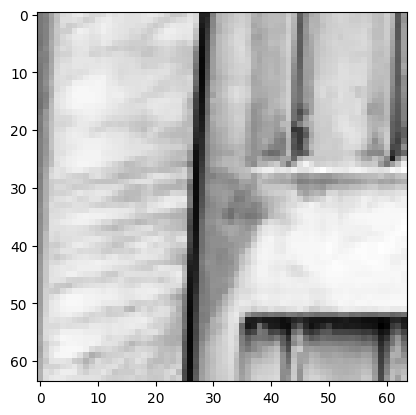

In [6]:
# Ingrese código para desplegar imagen W_01_002.png (usando imageload y librería matplotlib)
#

clase     = 1                      # <= NÚMERO DE LA CLASE
dig_clase = 2                      # <= NÚMERO DE DÍGITOS POR CLASE
num_img   = 2                      # <= NÚMERO DE LA IMAGEN
dig_img   = 3                      # <= NÚMERO DE DÍGITOS POR NÚMERO DE IMAGEN
fpath     = 'rayas'                # <= DIRERCTORIO DE LA BASE DE DATOS
prefix    = 'W_'                   # <= PREFIJO DEL NOMBRE DEL ARCHIVO DE LA IMAGEN
imprefix  = fpath + '/' + prefix

ImgPrueba = 255*imageload(imprefix,clase,dig_clase,num_img,dig_img,echo='on')

plt.imshow(ImgPrueba,cmap='gray')        # <= DESPLEGAR ImgPrueba EN TONOS DE GRIS
plt.show()


# Pregunta 3: Extracción de características

(10 puntos)

En esta pregunta se debe realizar la extracción de características de las 1200 imágenes. Las características a extraer deben ser 1) LBP, 2) HoG, 3) Gabor y 4) Haralick.


<font color='red'> **SALIDA ESPERADA:** 


La salida de esta celda (Pregunta 3) deben ser 4 matrices de 1200 filas y `m` columnas y un vector de 1200 elementos de la siguiente manera: 

* Matriz `X1` para LBP (calcular el LBP usando una sola partición de 59 elementos, `m=59`)

* Matriz `X2` para HoG (calcular el HoG usando una sola celda de 9 bins,`m=9`)

* Matriz `X3` para Gabor (calcular Gabor usando con 8 rotaciones y 8 escalas, `m=67`)

* Matriz `X4` para Haralick (calcular el LBP usando distancia 3, `m=24`)

* Vector `y` para el Ground Truth de cada muestra (este vector debe ser un array del tipo `int` con 1200 elementos) 

<font color='red'> Para escribir este código reutilice los códigos vistos en clase, como por ejemplo la pregunta 3 del [Ejercicio E04](https://drive.google.com/file/d/1p2_IWE1DncJ8P29VCvex031xTgPQUqFL/view?usp=sharing).


In [7]:
# INGRESE CODIGO PARA EXTRAER CARACTERISTICAS
#
# (no inventar, usar código de Ejercicio 04 ,ver AYUDA al inicio de este Colab)
#
# Al final de la ejecución de este código deben haber sido creadas:
#
# Matriz X1
# Matriz X2 
# Matriz X3 
# Matriz X4 
# Vector y
#


K    = 2     # <= NUMERO DE CLASES
N    = 600   # <= NUMERO DE IMAGENES POR CLASE
Mlbp = 59    # <= NUMERO DE ELEMENTOS DEL VECTOR LBP
Mhog = 9     # <= NUMERO DE ELEMENTOS DEL VECTOR DE HoG
Mgab = 67    # <= NUMERO DE ELEMENTOS DEL VECTOR DE GABOR
Mhar = 24    # <= NUMERO DE ELEMENTOS DEL VECTOR DE HARALICK

X1  = np.zeros((K*N,Mlbp))    # K*N muestras (filas), y Mlbp características (columnas)
X2  = np.zeros((K*N,Mhog))    # K*N muestras (filas), y Mhog características (columnas)
X3  = np.zeros((K*N,Mgab))    # K*N muestras (filas), y Mgab características (columnas)
X4  = np.zeros((K*N,Mhar))    # K*N muestras (filas), y Mhar características (columnas)

y     = np.zeros((K*N),'int')   # ground truth (clasificacion ideal)

t = 0

print('Cargando imagenes y extrayendo características...')
for j in range(K):            # para cada clase
  print('Extrayendo características: batch '+str(j+1)+'/'+str(K))
  for i in tqdm(range(N)):                # para cada imagen de la clase
    # Lectura de la imagen
    clase     = j+1
    num_img   = i+1
    img       = 255*imageload(imprefix,clase,dig_clase,num_img,dig_img) # <= LEER LA IMAGEN CORRESPONDIENTE

    # Extracción de características

    # LBP clásico de 1x1 particiones
    X1[t,:] = lbp(img, hdiv=1, vdiv=1)               # <= EXTRAER LBP

    # HoG clásico de 1x1 particiones
    X2[t,:] = hog(img, orientations=9, pixels_per_cell=(64,64),cells_per_block=(1,1),norm=False)   # <= EXTRAER HOG

    # Gabor con 8 rotaciones y 8 escalas
    X3[t,:] = gabor(img, rotations=8, dilations=8) # <= EXTRAER GABOR

    # Haralick con d = 3 pixeles
    X4[t,:] = haralick(img, distance=3)            # <= EXTRAER HARALICK

  

    y[t] = j # la muestra t pertenece a la clase j
    t = t+1



Cargando imagenes y extrayendo características...
Extrayendo características: batch 1/2


  0%|          | 0/600 [00:00<?, ?it/s]

Extrayendo características: batch 2/2


  0%|          | 0/600 [00:00<?, ?it/s]

## Considere que...

En la Pregunta 3 fueron extraídas las características para todas las imágenes de la base de datos. No olvidar que son 600 imágenes por clase, y que son 2 clases. En este Ejercicio, el clasificador será  un clasificador KNN de 1 vecino que será entrenado (training) con las primeras 450 muestras de cada clase, y probado (testing) con las 150 restantes por clase.



# Pregunta 4: Definición de características a utilizar

(1 punto)

A partir de las variables `X1`, `X2`, `X3`, `X4` del paso anterior, defina la matriz `X` a partir de una concatenación de (algunas de) las caracetrísticas extraídas. La forma de combinar las características es libre, es decir `X` puede ser Gabor y HOG, o bien LBP, HoG y Haralick, u otras combinaciones.

In [8]:
# INGRESE CODIGO DE CONCATENACION
# Al final de esta ejecución debe haber sido creada la matriz X
# (una línea de código)
#

X = np.concatenate((X1,X2,X4), axis=1)  # <= CONCATENACIÓN DE LBP, HoG Y Haralick

# Pregunta 5: Separación Training / Testing

(1 punto)

El conjunto de training debe contener las primeras 450 muestras por clase. El conjunto de testing debe contener las restantes 150 muestras por clase.

Separar `X,y` en `Xtrain,ytrain`, `Xtest,ytest`

Ayuda: usar función `SplitTrainTest` definida más arriba en la seeción "Funciones Necesarias".

In [9]:
# INGRESE CODIGO DE SEPARACION TRAIN/TEST
# Al final de esta ejecución debe haber sido creadas las variables Xtrain,ytrain,Xtest,ytest
# (una línea de código)
#

Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,450) # <= FUNCION QUE SEPARA TRAINING Y TESTING

# Pregunta 5: Clasificación

(4 puntos)

Diseñar el clasificador usando `Xtrain,ytrain`, pruebe el clasificador en `Xtest`, y compare la clasifición con `ytest`.

Ayuda: usar funcion `ClassifierKNN` definida más arriba en la seeción "Funciones Necesarias".

La salida de esta celda debe ser `acc` para el Accuracy, y `C` para la matriz de confusión de 2x2 elementos.


In [10]:
# INGRESE CODIGO DE CLASIFICACIÓN Y EVALUACIÓN
# Al final de esta ejecución debe haber sido creada la variable acc y la matriz de confusion C
# (una línea de código)
#

acc,C = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)  # calculo de accuracy y matriz de confusion

Entrenando con 900 muestras y probando con 300 muestras
Testing Accuracy = 91.33333333333333%
Matriz de Confusión:
[[135  15]
 [ 11 139]]


<font color='orange'>**IMPORTANTE:** El Accuracy debe ser 91.0% o más.


In [11]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

print('P1: ImgPrueba(12,15):',ImgPrueba[12,15])
print('P2:       LBP (2,20):',X1[2,20])
print('P2:       HOG (2, 7):',X2[2,7])
print('P2:       GAB (2,20):',X3[2,20])
print('P2:       HAR (2,20):',X4[2,20])
print('P2:      GroundTruth:',y[10],y[1100])
print('P3:         SIZE (X):',X.shape)
print('P4:    SIZE (Xtrain):',Xtrain.shape)
print('P4:     SIZE (Xtest):',Xtest.shape)
print('P5:              ACC:',acc*100)
print('P5:         SIZE (C):',C.shape)


P1: ImgPrueba(12,15): 156.0
P2:       LBP (2,20): 13.0
P2:       HOG (2, 7): 0.38260430097579956
P2:       GAB (2,20): 351.07701831843616
P2:       HAR (2,20): 0.00795395852929321
P2:      GroundTruth: 0 1
P3:         SIZE (X): (1200, 92)
P4:    SIZE (Xtrain): (900, 92)
P4:     SIZE (Xtest): (300, 92)
P5:              ACC: 91.33333333333333
P5:         SIZE (C): (2, 2)


# VERIFICACION FINAL

<font color='red'> **ADVERTENCIA:** Este ejercicio será evaluado de la siguiente manera: si el código funciona y el resultado es correcto, la pregunta tendrá un 100% de la evaluación, en caso contrario 0%. Para asegurarse que el código se ejecute sin caídas seleccione la opción del menú:

1) <font color='orange'> 'Runtime' + 'Disconnect and delete runtime' (inicializa todo)

2) <font color='orange'> 'Run all'

<font color='red'> El código debería ejecutarse desde el inicio hasta el final sin problema alguno.

# PASO FINAL: Subir tarea

<font color='orange'> **ADVERTENCIA FINAL:** Este archivo, que debe llamarse [tu RUT].ipynb, (el RUT debe ser sin puntos ni guion) y debe subirse a Canvas según la hora señalada para la actividad E05.